# Introduction

In this notebook, we analyse the oracles generated in **feat_br_orc_v2_gen** notebook:
 
 * Feat_BR_volunteers
 * Feat_BR_expert
 * Feat_BR_volunteers_expert_union
 * Feat_BR_volunteers_expert_intersec

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np

from sklearn.metrics import cohen_kappa_score

from modules.utils import firefox_dataset_p2 as fd
from modules.utils import aux_functions

from matplotlib import pyplot as plt

In [2]:
feat_br_expert_volunteers_union_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df()
feat_br_expert_volunteers_intersec_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df()
feat_br_volunteers_oracle = fd.Feat_BR_Oracles.read_feat_br_volunteers_df()
feat_br_expert_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_df()
print()

br_2_feature_matrix_final = fd.Feat_BR_Oracles.read_br_2_features_matrix_final_df()
print()

bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

Expert and Volunteers Matrix UNION.shape: (93, 21)
Expert and Volunteers Matrix INTERSEC.shape: (93, 21)
Volunteers Matrix shape: (93, 21)
Expert Matrix shape: (93, 21)

BR_2_Features Matrix Final.shape: (93, 4)

SelectedBugReports.shape: (93, 18)
Features.shape: (21, 8)


# Cohen's Kappa - Features x Bug Reports Trace Matrix

The Cohen's Kappa Score measures the iter-rater agreement for qualitive answers (categorical items). It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance.

In the section bellow, we calculate the Cohen's kappa with the expert answers and the volunteers answers.

In [4]:
expert_answers = []
volunteers_answers = []

for idx,row in feat_br_volunteers_oracle.iterrows():
    for col in feat_br_volunteers_oracle.columns:
        volunteers_answers.append(feat_br_volunteers_oracle.at[idx,col])
        expert_answers.append(feat_br_expert_oracle.at[idx,col])

print("Expert Answers Length: {}".format(len(expert_answers)))
print("Volunteers Answers Length: {}".format(len(volunteers_answers)))

print("Cohen Kappa Score: {}".format(cohen_kappa_score(expert_answers, volunteers_answers)))

Expert Answers Length: 1953
Volunteers Answers Length: 1953
Cohen Kappa Score: 0.46050047741726263


We can observe that we have a weak inter-rater agreement level, because the kappa is between 0.40 and 0.51, we have only 15-35% of the data reliable. [Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900052/)

# Calculate Sparsity

In [5]:
print('feat_br_volunteers_oracle sparsity: {:>40.2%}'.format(aux_functions.calculate_sparsity(feat_br_volunteers_oracle)))
print('feat_br_expert_oracle sparsity: {:>44.2%}'.format(aux_functions.calculate_sparsity(feat_br_expert_oracle)))
print()
print('feat_br_expert_volunteers_oracle_union sparsity: {:>27.2%}'.format(aux_functions.calculate_sparsity(feat_br_expert_volunteers_union_oracle)))
print('feat_br_expert_volunteers_oracle_intersec sparsity: {:>24.2%}'.format(aux_functions.calculate_sparsity(feat_br_expert_volunteers_intersec_oracle)))

feat_br_volunteers_oracle sparsity:                                   94.16%
feat_br_expert_oracle sparsity:                                       96.72%

feat_br_expert_volunteers_oracle_union sparsity:                      92.88%
feat_br_expert_volunteers_oracle_intersec sparsity:                   98.00%


# Distribution Amount Features by BRs

[]

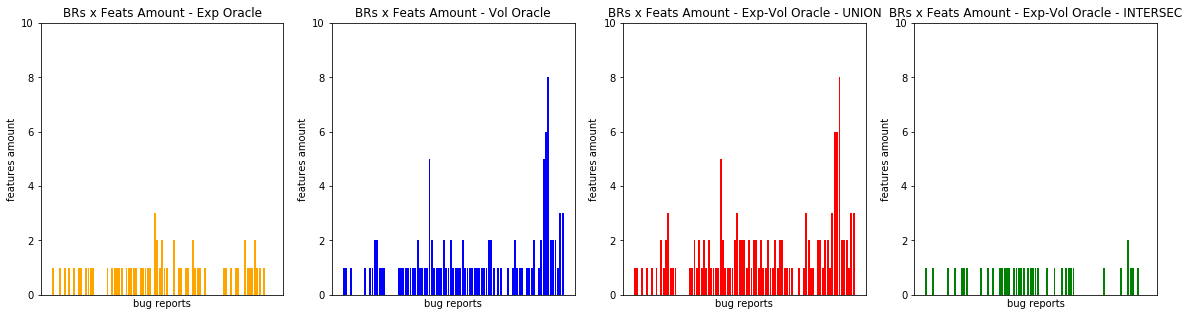

In [6]:
brs_expert = feat_br_expert_oracle.index
feats_amount_expert = feat_br_expert_oracle.apply(lambda row : sum(row.values), axis=1)

brs_vol = feat_br_volunteers_oracle.index
feats_amount_vol = feat_br_volunteers_oracle.apply(lambda row : sum(row.values), axis=1)

brs_exp_vol = feat_br_expert_volunteers_union_oracle.index
feats_amount_exp_vol_union = feat_br_expert_volunteers_union_oracle.apply(lambda row : sum(row.values), axis=1)

brs_exp_vol = feat_br_expert_volunteers_intersec_oracle.index
feats_amount_exp_vol_intersec = feat_br_expert_volunteers_intersec_oracle.apply(lambda row : sum(row.values), axis=1)

f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,5))

ax1.set_title('BRs x Feats Amount - Exp Oracle')
ax1.bar(x=np.arange(len(feat_br_expert_oracle)), height=feats_amount_expert, color='orange')
ax1.set(xlabel='bug reports', ylabel='features amount')
ax1.set_ylim([0, 10])
ax1.xaxis.set_ticks([])

ax2.set_title('BRs x Feats Amount - Vol Oracle')
ax2.bar(x=np.arange(len(feat_br_volunteers_oracle)), height=feats_amount_vol, color='blue')
ax2.set(xlabel='bug reports', ylabel='features amount')
ax2.set_ylim([0, 10])
ax2.xaxis.set_ticks([])

ax3.set_title('BRs x Feats Amount - Exp-Vol Oracle - UNION')
ax3.bar(x=np.arange(len(feat_br_expert_volunteers_union_oracle)), height=feats_amount_exp_vol_union, color='red')
ax3.set(xlabel='bug reports', ylabel='features amount')
ax3.set_ylim([0, 10])
ax3.xaxis.set_ticks([])

ax4.set_title('BRs x Feats Amount - Exp-Vol Oracle - INTERSEC')
ax4.bar(x=np.arange(len(feat_br_expert_volunteers_intersec_oracle)), height=feats_amount_exp_vol_intersec, color='green')
ax4.set(xlabel='bug reports', ylabel='features amount')
ax4.set_ylim([0, 10])
ax4.xaxis.set_ticks([])

# Analysis of Histograms of Features Amounts

(array([55.,  0.,  0.,  0.,  0., 37.,  0.,  0.,  0.,  1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

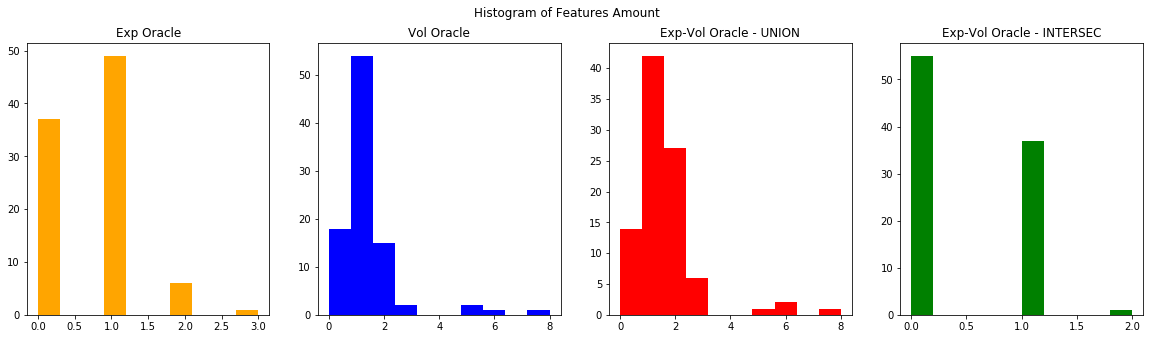

In [7]:
f2, (ax4,ax5,ax6,ax7) = plt.subplots(1, 4, figsize=(20,5))

f2.suptitle(t='Histogram of Features Amount')

ax4.set_title('Exp Oracle')
ax4.hist(feats_amount_expert, color='orange')

ax5.set_title('Vol Oracle')
ax5.hist(feats_amount_vol, color='blue')

ax6.set_title('Exp-Vol Oracle - UNION')
ax6.hist(feats_amount_exp_vol_union, color='red')

ax7.set_title('Exp-Vol Oracle - INTERSEC')
ax7.hist(feats_amount_exp_vol_intersec, color='green')

# Analysis of Volunteers Answers

In [8]:
feat_br_volunteers_oracle.head()

,new_awesome_bar,windows_child_mode,apz_async_scrolling,browser_customization,pdf_viewer,context_menu,w10_comp,tts_in_desktop,tts_in_rm,webgl_comp,...,pointer_lock_api,webm_eme,zoom_indicator,downloads_dropmaker,webgl2,flac_support,indicator_device_perm,flash_support,notificationbox,update_directory
bug_number,,,,,,,,,,,,,,,,,,,,,
1181835,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1248267,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1248268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1257087,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1264988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Analysis of Bug Reports x Features Matrix Final

In [10]:
br_2_feature_matrix_final.iloc[0:30,:]

,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m
Bug_Number,,,,
1181835,6,6,6,6
1248267,,4,4,
1248268,,,,
1257087,1,1,1,1
1264988,,,,
1267480,3,,3,
1267501,,,,
1269348,3,,3,
1269485,,,,


In [11]:
br_2_feature_matrix_final.iloc[30:60,:]

,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m
Bug_Number,,,,
1290424,,1,1,
1291770,15,15 20,15 20,15
1292566,15,15,15,15
1292573,1,1,1,1
1293308,1,1,1,1
1294733,1,1,1,1
1294887,,3 10 16 17 19,3 10 16 17 19,
1295502,18,18 20,18 20,18
1296322,1,1,1,1


In [12]:
br_2_feature_matrix_final.iloc[60:100,:]

,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m
Bug_Number,,,,
1313778,1,1,1,1
1313969,1,1 6,1 6,1
1314643,1,1 4,1 4,1
1315514,,14 17,1,
1316126,4,8 9 11 17 18,4,
1318903,,1,20,
1319119,,,20,
1319433,,20,,
1319919,,20,,
